# Ví dụ 1

In [1]:
import zipfile
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Tiếp theo, ta thiết lập các đường dẫn đến các tệp dữ liệu

In [1]:
import os

base_dir = 'cats_and_dogs_filtered'

# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


Tham chiếu các phân lớp cho dữ liệu train và validation (tên thư mục là tên phân lớp)

In [2]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


Chúng ta sẽ lấy danh sách tên file từng loại ảnh train/validation và in thử một số tên file cũng như thống kê số file ảnh
mỗi phân lớp để kiểm tra

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Chúng ta thử in ra một số ảnh của mỗi loại để kiểm tra

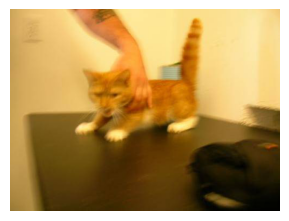

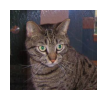

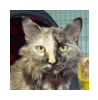

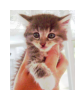

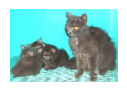

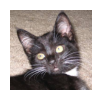

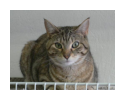

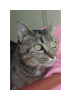

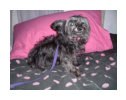

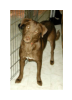

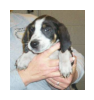

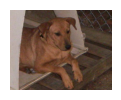

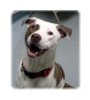

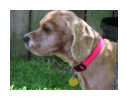

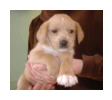

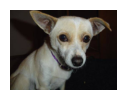

In [4]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)

for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

Khởi tạo mô hình CNN

In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dense(1, activation='sigmoid'),
])

Ta có thể xem lại kiến trúc mô hình qua lệnh

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Huấn luyện mô hình

In [7]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Gọi lệnh huấn luyện mô hình

In [8]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15
100/100 - 25s - loss: 0.8357 - accuracy: 0.5365 - val_loss: 0.6656 - val_accuracy: 0.6440 - 25s/epoch - 254ms/step
Epoch 2/15
100/100 - 10s - loss: 0.6572 - accuracy: 0.6480 - val_loss: 0.6319 - val_accuracy: 0.6620 - 10s/epoch - 100ms/step
Epoch 3/15
100/100 - 10s - loss: 0.5880 - accuracy: 0.7040 - val_loss: 0.5789 - val_accuracy: 0.7070 - 10s/epoch - 96ms/step
Epoch 4/15
100/100 - 10s - loss: 0.4873 - accuracy: 0.7595 - val_loss: 0.5945 - val_accuracy: 0.6820 - 10s/epoch - 103ms/step
Epoch 5/15
100/100 - 10s - loss: 0.4102 - accuracy: 0.8200 - val_loss: 0.5841 - val_accuracy: 0.7040 - 10s/epoch - 103ms/step
Epoch 6/15
100/100 - 10s - loss: 0.3042 - accuracy: 0.8650 - val_loss: 1.2285 - val_accuracy: 0.6180 - 10s/epoch - 98ms/step
Epoch 7/15
100/100 - 9s - loss: 0.2617 - accuracy: 0.9015 - val_loss: 0.7247 - val_accuracy: 0.7050 - 9s/epoch - 94ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1632 - accuracy: 0.9305 - val_loss: 1.0323 - val_accuracy: 0.7020 - 9s/epoch - 92ms/step


Xem xét một số kết quả

1/1 [==============================] - 0s 288ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_15944\573956992.py:40: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\Admin\AppData\Local\Temp\ipykernel_15944\573956992.py:43: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


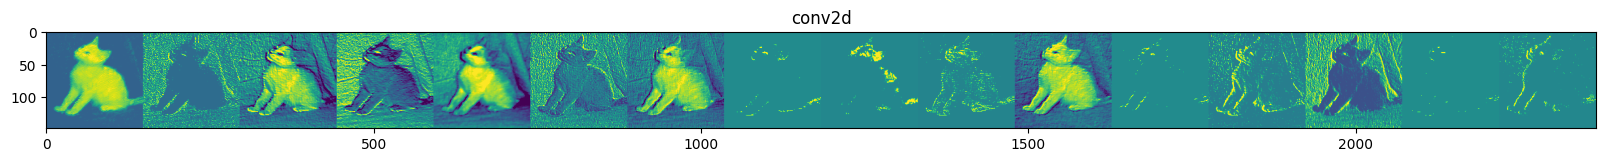

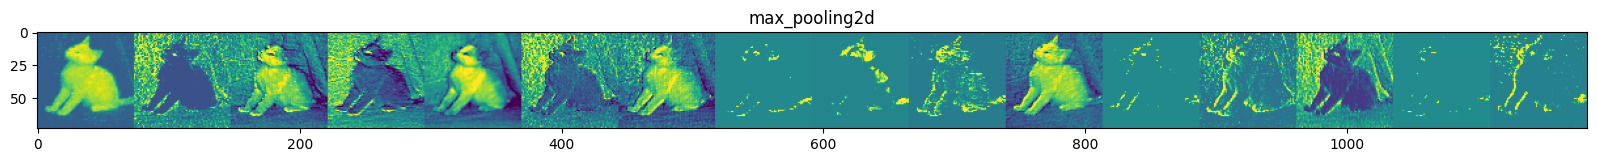

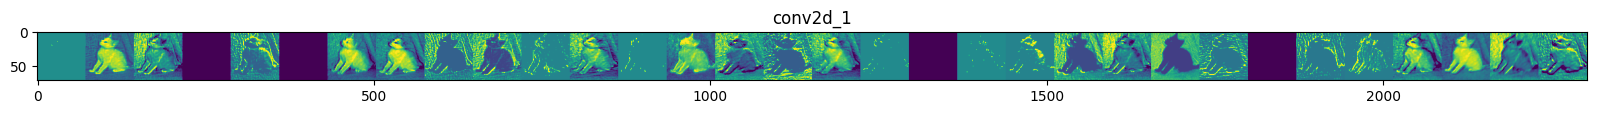

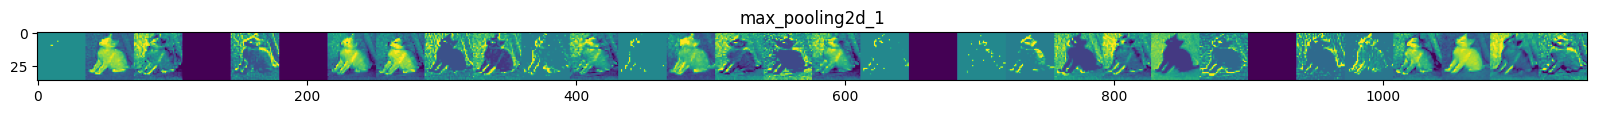

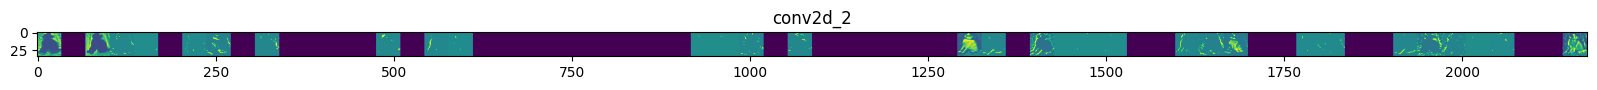

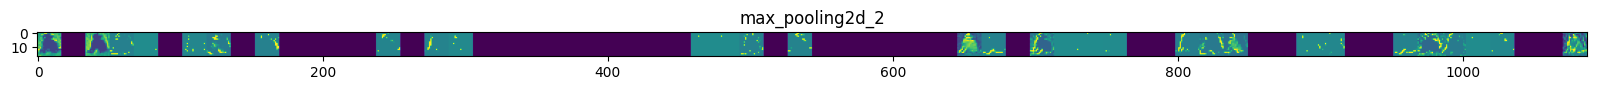

In [9]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs =
successive_outputs)
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so we can have them as part of our plot

layer_names = [layer.name for layer in model.layers]
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Trong đoạn lệnh trên, chúng ta sẽ in ra kết quả sau mỗi tầng (“ảnh” đầu ra sau mỗi tầng convolution và maxpool) để
hiểu thêm cách hoạt động của CNN để cho ra dãy so sánh được ở tầng flatten.
Đoạn lệnh tiếp theo chúng ta thử sử dụng mô hình với các tham số đã được huấn luyện (train) để dự đoán (predict)
cho một số ảnh đầu vào tùy ý (chú ý cần có chó hoặc mèo). Chúng ta hãy sửa đoạn lệnh này để áp dụng cho một list
các tên file ảnh đầu vào, thay vì từng ảnh như trong hướng dẫn.

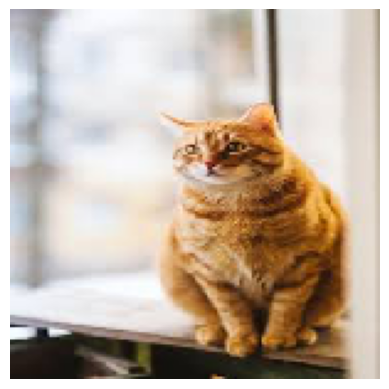

1/1 [==============================] - 0s 33ms/step
1.jpg is a cat


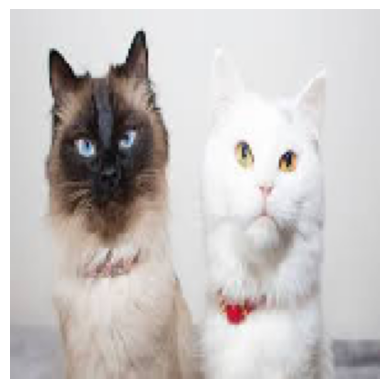

1/1 [==============================] - 0s 30ms/step
2.jpg is a cat


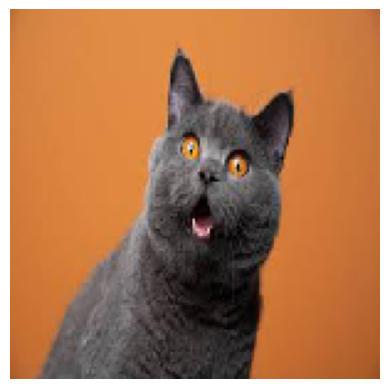

1/1 [==============================] - 0s 30ms/step
3.jpg is a cat


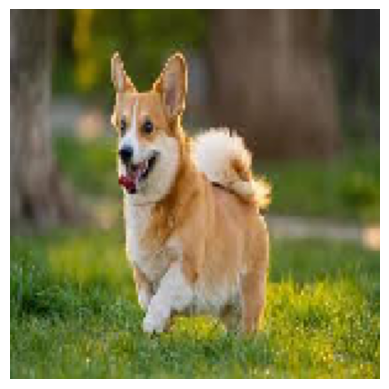

1/1 [==============================] - 0s 36ms/step
4.jpg is a dog


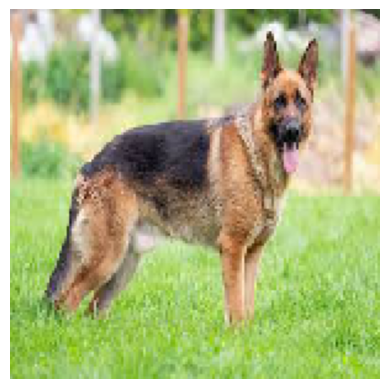

1/1 [==============================] - 0s 28ms/step
5.jpg is a dog


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# #uploaded=files.upload()
# #for fn in uploaded.keys():
# fn = '4.jpg' # change it to your image file

# List of image file names
l = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

# Predicting images
for i in l:
    path = "cat_dog_photo/"+ i
    img = load_img(path, target_size=(150, 150))  
    plt.imshow(img)  
    plt.axis('off')  
    plt.show()  

    x = img_to_array(img)  
    x /= 255  # Normalize pixel values
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    images = np.vstack([x])  # Stack the image arrays

    classes = model.predict(images, batch_size=10)  
    if classes[0] > 0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")


Tính toán các độ đo độ chính xác (accuracy) và hàm tổn thất, sau đó vẽ đồ thị để minh họa.

In [15]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Train Accuracy: 0.9919999837875366
Validation Accuracy: 0.7139999866485596


Text(0.5, 1.0, 'Training and validation loss')

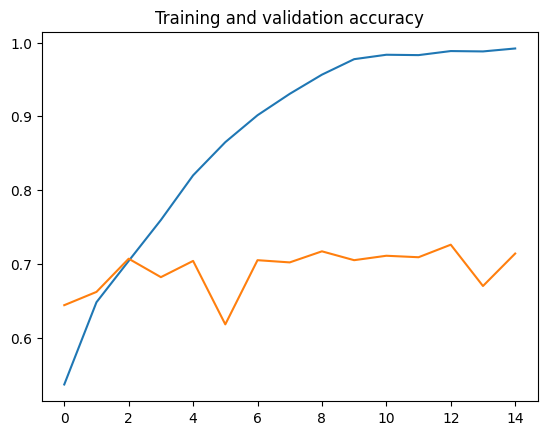

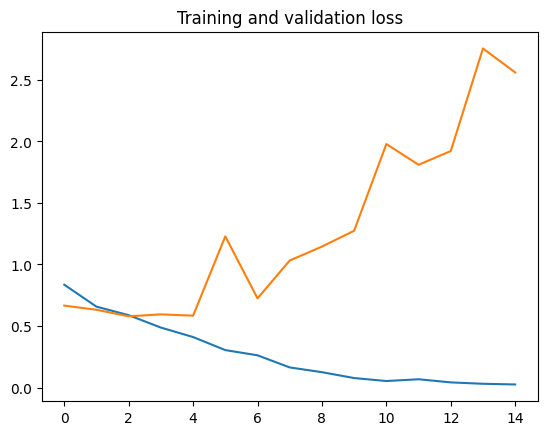

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

# Bài tập tự thực hành 1

Quan sát Loss Function và Accuracy trên tập Training và trên tập Validation. Giải thích những kết quả quan sát
được.

- Độ chính xác của train so với độ chính xác của validation:
    + Độ chính xác của dữ liệu huấn luyện cao cho thấy mô hình hoạt động rất tốt trên dữ liệu đào tạo. Nó đã học cách phân loại các ví dụ huấn luyện với độ chính xác ấn tượng.
    + Độ chính xác xác thực thấp hơn đáng kể so với độ chính xác trong đào tạo. Sự khác biệt này cho thấy rằng mô hình hoạt động không tốt trên dữ liệu không nhìn thấy (bộ xác thực) so với dữ liệu mà nó đã được đào tạo. Mô hình có thể bị overfit với dữ liệu huấn luyện.

- Loss của train so với Loss của validation:
    + Hàm của huấn luyện rất thấp cho thấy dự đoán của mô hình rất gần với giá trị mục tiêu thực tế trong tập huấn luyện. Đây là một chỉ số khác về hiệu suất tốt trên dữ liệu đào tạo.
    + Hàm của xác nhận cao hơn đáng kể so với hàm mất đào tạo. Tỷ lệ mất xác thực cao có nghĩa là dự đoán của mô hình không chính xác trên bộ xác thực. Điều này phù hợp với độ chính xác xác thực thấp hơn và cho thấy mô hình đang gặp khó khăn trong việc khái quát hóa tốt các dữ liệu mới.

- Suy ra:
    + Lý do: Mô hình có khả năng khớp quá mức với dữ liệu huấn luyện.
    + Ta có thể nhiều thu thập dữ liệu đa dạng hơn hoặc điều chỉnh kiến ​​trúc mô hình có thể giúp cải thiện khả năng khái quát hóa thành các ví dụ chưa thấy.

Layer Dropout cho phép bỏ bớt dữ liệu train với tỉ lệ là rate_drop, nhằm mục đích tránh
overfit. Hãy bổ sung các tầng Dropout này vào giữa các tầng Convolution, rate_drop khoảng từ 0.3 đến 0.5 và
quan sát kết quả sau khi thay đổi.

In [17]:
import random
import tensorflow as tf

model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15
100/100 - 11s - loss: 0.8366 - accuracy: 0.5245 - val_loss: 0.6808 - val_accuracy: 0.6360 - 11s/epoch - 109ms/step
Epoch 2/15
100/100 - 9s - loss: 0.6894 - accuracy: 0.5680 - val_loss: 0.6874 - val_accuracy: 0.5260 - 9s/epoch - 88ms/step
Epoch 3/15
100/100 - 9s - loss: 0.6441 - accuracy: 0.6230 - val_loss: 0.6133 - val_accuracy: 0.6500 - 9s/epoch - 90ms/step
Epoch 4/15
100/100 - 9s - loss: 0.6138 - accuracy: 0.6695 - val_loss: 0.6108 - val_accuracy: 0.6750 - 9s/epoch - 90ms/step
Epoch 5/15
100/100 - 9s - loss: 0.5842 - accuracy: 0.6985 - val_loss: 0.6159 - val_accuracy: 0.6660 - 9s/epoch - 91ms/step
Epoch 6/15
100/100 - 9s - loss: 0.5769 - accuracy: 0.6970 - val_loss: 0.6101 - val_accuracy: 0.6340 - 9s/epoch - 89ms/step
Epoch 7/15
100/100 - 9s - loss: 0.5384 - accuracy: 0.7210 - val_loss: 0.5532 - val_accuracy: 0.7100 - 9s/epoch - 90ms/step
Epoch 8/15
100/100 - 9s - loss: 0.5173 - accuracy: 0.7515 - val_loss: 0.5514 - val_accuracy: 0.7020 - 9s/epoch - 89ms/step
Epoch 9/15
10

In [20]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Train Accuracy: 0.8144999742507935
Validation Accuracy: 0.7250000238418579


Thực hiện chuyển ảnh thành vector, sau đó sử dụng mô hình Hồi quy Logistic để phân loại ảnh. Đánh giá độ
chính xác bằng các độ đo.

In [22]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        # Bỏ qua các thư mục không mong muốn
        
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)  # One-hot encoding for 'dog' (1, 0)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
# images, labels = load_data(train_dir)

X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(validation_dir)


# images = np.array(images)
# labels = np.array(labels)

# #Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_flatten, y_train)

# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.546
Precision: 0.542910447761194
Recall: 0.582
F1 Score: 0.5617760617760618


Dùng PCA giảm số chiều về còn 225. Sau đó sử dụng mô hình ANN đã có để phân loại (có thể tham khảo
chương trình đã được cung cấp cho bộ ảnh mặt người). So sánh độ chính xác so với các phương pháp:
Logistic, ANN và CNN.

In [23]:
from sklearn.decomposition import PCA

# Flatten images
X_flatten_train = X_train.reshape(X_train.shape[0], -1)
X_flatten_test = X_test.reshape(X_test.shape[0], -1)

# Initialize PCA with n_components=225
pca = PCA(n_components=225)

# Fit PCA to flattened images
pca.fit(X_flatten_train)
pca.fit(X_flatten_test)

# Transform flattened images to reduced dimension
X_reduced_train = pca.transform(X_flatten_train)
X_reduced_test = pca.transform(X_flatten_test)

X_reduced_train.shape

(2000, 225)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,)))  # Mô hình ANN
])

pipeline.fit(X_reduced_train, y_train)

accuracy = pipeline.score(X_reduced_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.587


Sưu tầm một số ảnh về 02 loài động vật trên, đặt trong cùng thư mục ( >= 10 ảnh) <br>
Chạy predict cho toàn bộ các ảnh sưu tập và đánh giá độ chính xác.

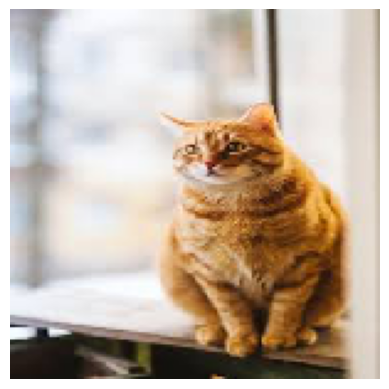

1/1 [==============================] - 0s 107ms/step
1.jpg is a cat


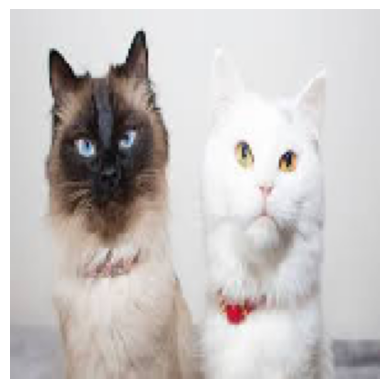

1/1 [==============================] - 0s 28ms/step
2.jpg is a cat


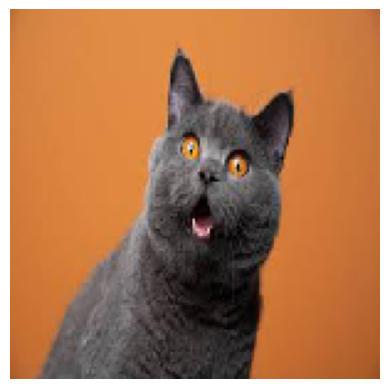

1/1 [==============================] - 0s 28ms/step
3.jpg is a cat


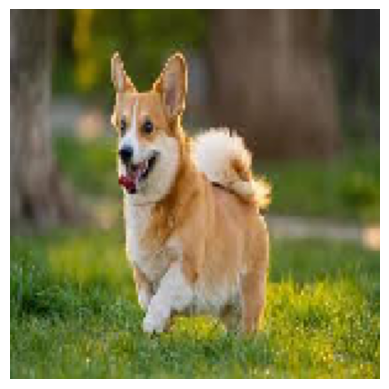

1/1 [==============================] - 0s 37ms/step
4.jpg is a dog


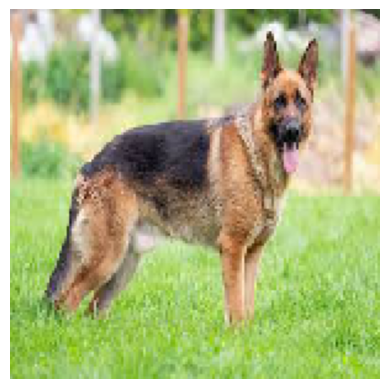

1/1 [==============================] - 0s 28ms/step
5.jpg is a dog


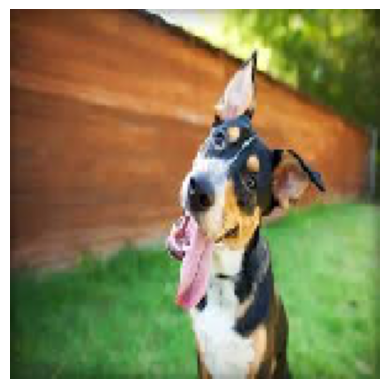

1/1 [==============================] - 0s 29ms/step
6.jpg is a dog


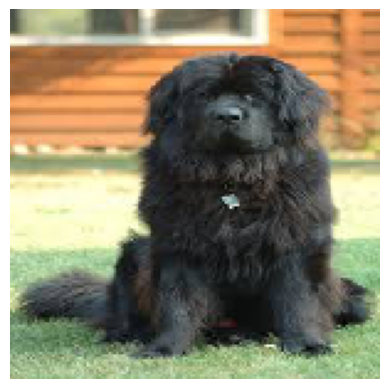

1/1 [==============================] - 0s 30ms/step
7.jpg is a dog


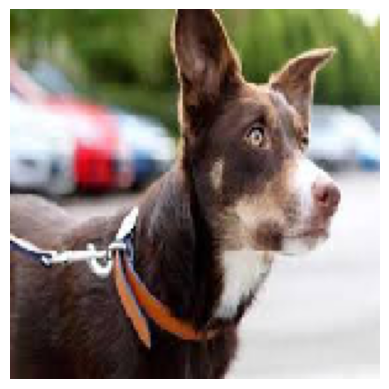

1/1 [==============================] - 0s 28ms/step
8.jpg is a dog


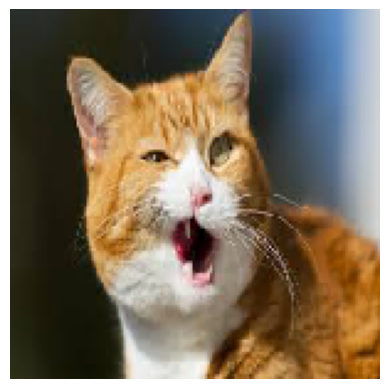

1/1 [==============================] - 0s 31ms/step
9.jpg is a dog


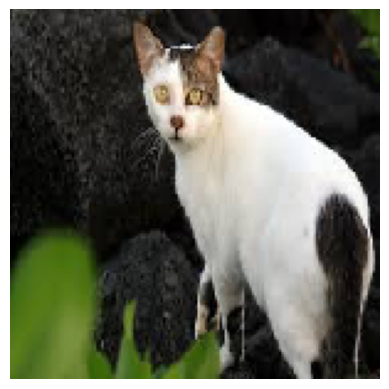

1/1 [==============================] - 0s 29ms/step
10.jpg is a cat


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# #uploaded=files.upload()
# #for fn in uploaded.keys():
# fn = '4.jpg' # change it to your image file

# List of image file names
l = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

# Predicting images
for i in l:
    path = "cat_dog_photo/"+ i
    img = load_img(path, target_size=(150, 150))  
    plt.imshow(img)  
    plt.axis('off')  
    plt.show()  

    x = img_to_array(img)  
    x /= 255  # Normalize pixel values
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    images = np.vstack([x])  # Stack the image arrays

    classes = model.predict(images, batch_size=10)  
    if classes[0] > 0.5:
        print(i + " is a dog")
    else:
        print(i + " is a cat")


Độ chính xác: tương đối đúng, vẫn có hình ảnh nhận diện sai

# Ví dụ 2

In [27]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

Đoạn code tiếp theo thực hiện việc khởi dựng mô hình CNN với kiến trúc gồm:
- 3 tầng Convolution & MaxPooling nối tiếp: Tầng đầu gồm 16 filters; Tầng 2 gồm 32 filters và tầng ba gồm 64
filters, tất cả có cùng cỡ 3x3;
- Tiếp theo tầng Convolution thứ ba là tầng Flatten;
- Tiếp theo đó ta có tầng FullyConnected (FullConnection) FC với đầu ra là vector đặc trưng 512 phần tử. Tất cả
các tầng Conv và FC đều sử dụng activation là ReLU;
- Cuối cùng, ta có tầng đầu ra với activation là SoftMax chia 03 loại.

In [28]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

Tiếp theo chúng ta thiết lập dữ liệu và gọi mô hình để huấn luyện và dự báo

In [35]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/animals',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')
    epochs = 2
    #Testing data
    validation_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    model.save_weights('saved_weights.h5')
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Cuối cùng chúng ta gọi thực hiện mô hình:

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


C:\Users\Admin\AppData\Local\Temp\ipykernel_15944\3756207221.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
150/150 [==============================] - 32s 202ms/step - loss: 0.9682 - acc: 0.5316 - val_loss: 0.7789 - val_acc: 0.6053
Epoch 2/2
150/150 [==============================] - 12s 81ms/step - loss: 0.6865 - acc: 0.6493 - val_loss: 0.7315 - val_acc: 0.6413


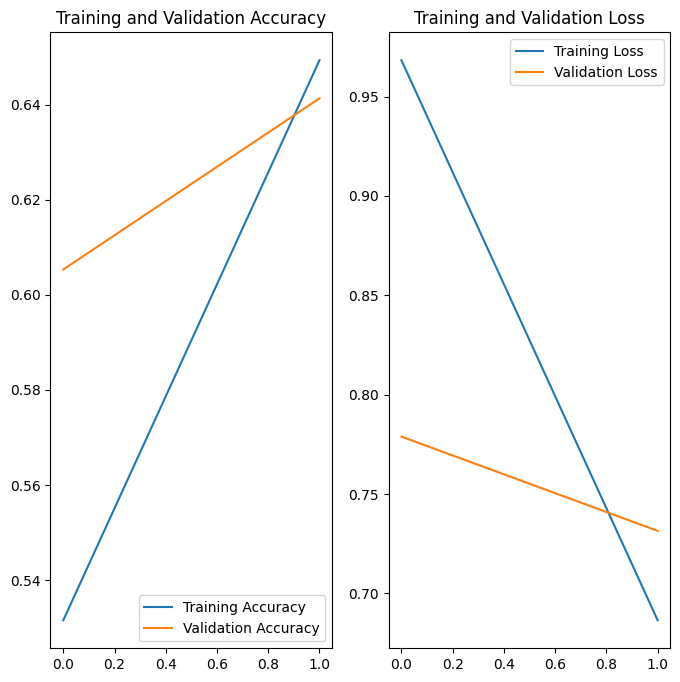

Training Accuracy:
0.6493333578109741
Testing Accuracy:
0.6413333415985107


In [31]:
train_test_animals()

Bài tập tự thực hành:
1. So sánh các mô hình
- Hãy đưa kích thước các ảnh (resize) về 150x150:
- Thực hiện chuyển ảnh thành vector, sau đó sử dụng mô hình Hồi quy SOFTMAX để phân loại ảnh. Đánh giá
độ chính xác bằng các độ đo.

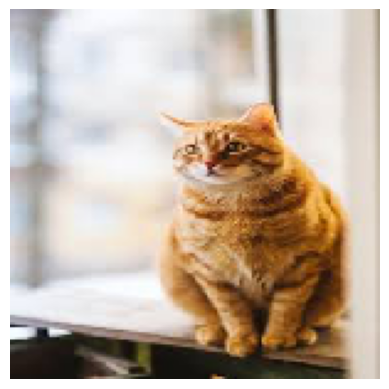

1/1 [==============================] - 0s 113ms/step
Image: cat_dog_photo/1.jpg, Predicted class: cat


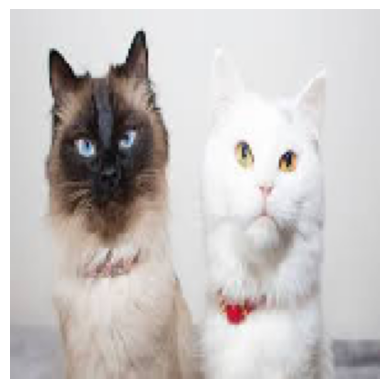

1/1 [==============================] - 0s 29ms/step
Image: cat_dog_photo/2.jpg, Predicted class: cat


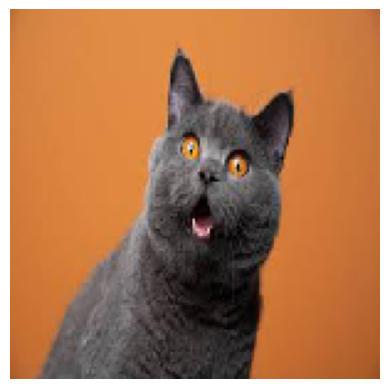

1/1 [==============================] - 0s 34ms/step
Image: cat_dog_photo/3.jpg, Predicted class: cat


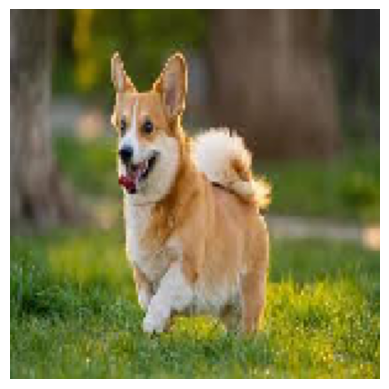

1/1 [==============================] - 0s 29ms/step
Image: cat_dog_photo/4.jpg, Predicted class: cat


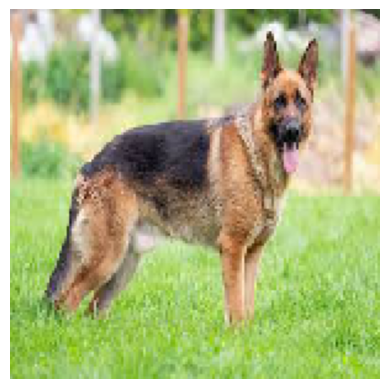

1/1 [==============================] - 0s 30ms/step
Image: cat_dog_photo/5.jpg, Predicted class: dog


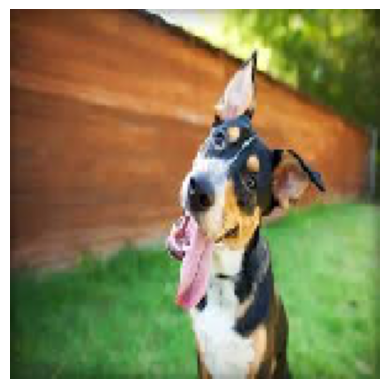

1/1 [==============================] - 0s 40ms/step
Image: cat_dog_photo/6.jpg, Predicted class: cat


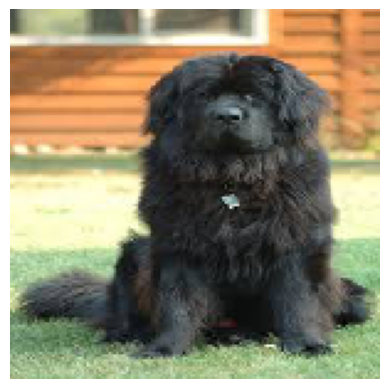

1/1 [==============================] - 0s 33ms/step
Image: cat_dog_photo/7.jpg, Predicted class: cat


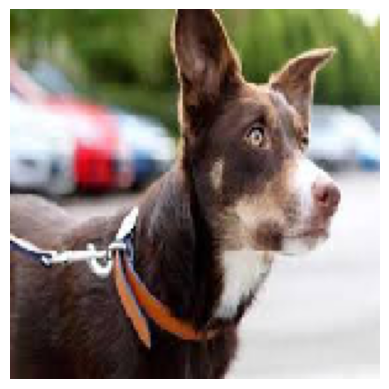

1/1 [==============================] - 0s 29ms/step
Image: cat_dog_photo/8.jpg, Predicted class: dog


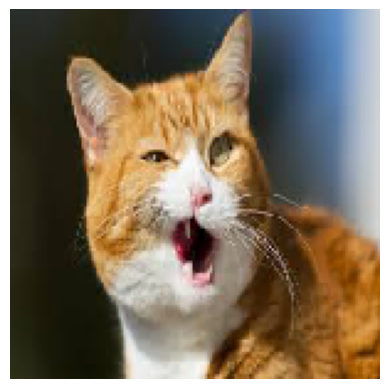

1/1 [==============================] - 0s 33ms/step
Image: cat_dog_photo/9.jpg, Predicted class: cat


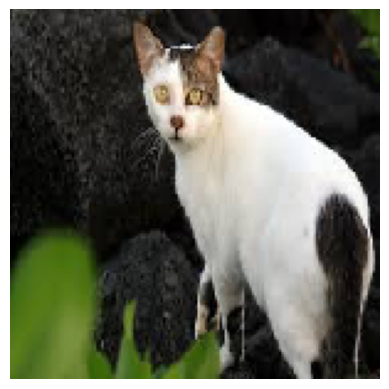

1/1 [==============================] - 0s 28ms/step
Image: cat_dog_photo/10.jpg, Predicted class: panda


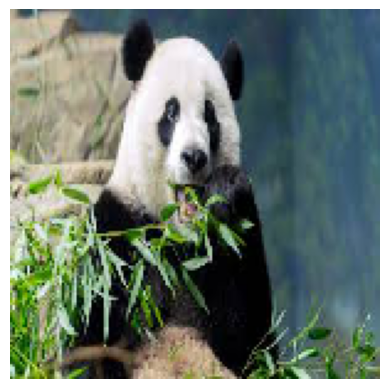

1/1 [==============================] - 0s 33ms/step
Image: cat_dog_photo/11.jpg, Predicted class: panda


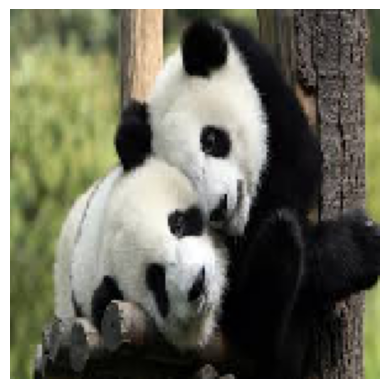

1/1 [==============================] - 0s 29ms/step
Image: cat_dog_photo/12.jpg, Predicted class: panda


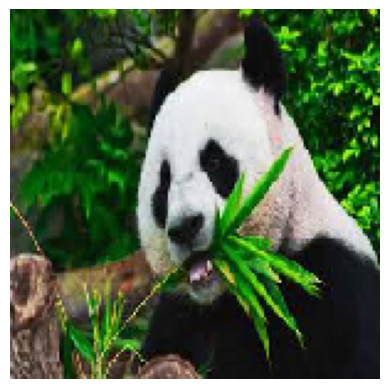

1/1 [==============================] - 0s 48ms/step
Image: cat_dog_photo/13.jpg, Predicted class: panda


In [36]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

def load_and_preprocess_image(image_path):
    # Load image and preprocess it
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize image to match input shape of the model
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(1, 150, 150, 3)  # Reshape to match model input shape
    return img

def classify_images(image_paths, model):
    classes = {0: 'cat', 1: 'dog', 2: 'panda'}  # Mapping from class index to class name

    for image_path in image_paths:
        # Load and preprocess image
        img = load_and_preprocess_image(image_path)
        
        imgage = load_img(image_path, target_size=(150, 150))
        
        plt.imshow(imgage)  # Display the image
        plt.axis('off')  # Turn off axis
        plt.show()  # Show the image
        
        # Predict class probabilities
        predictions = model.predict(img)
        
        # Get predicted class index
        predicted_class_index = np.argmax(predictions)
        
        # Get predicted class name
        predicted_class_name = classes[predicted_class_index]
        
        # Print result
        print(f"Image: {image_path}, Predicted class: {predicted_class_name}")

# Load pre-trained model
model = gen_model()
model.load_weights('saved_weights.h5')  # Load saved weights

# List of image paths to classify
image_paths = ['cat_dog_photo/' + str(num) + '.jpg' for num in range(1, 14)]

# Classify images
classify_images(image_paths, model)


Thực hiện chuyển ảnh thành vector, sau đó sử dụng mô hình Hồi quy SOFTMAX để phân loại ảnh. Đánh giá
độ chính xác bằng các độ đo.

In [37]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = 'CNN_MultiClass_data/animals'
validation_dir = 'CNN_MultiClass_data/validation'

In [38]:
# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

In [39]:
def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)# One-hot encoding for 'dog' (1, 0)
                elif label == 'panda':
                    labels.append(2)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
images, labels = load_data(train_dir)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [41]:
# Train a Softmax Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_flatten, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [42]:
# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5533333333333333
Precision: 0.5656620661725827
Recall: 0.5551539867079412
F1 Score: 0.5593536060580658


Dùng PCA giảm số chiều về còn 225. Sau đó sử dụng mô hình ANN đã có để phân loại. So sánh độ chính xác
so với các phương pháp: SOFTMAX, ANN và CNN.

In [43]:
from sklearn.decomposition import PCA

# Flatten images
X_flatten_train = X_train.reshape(X_train.shape[0], -1)
X_flatten_test = X_test.reshape(X_test.shape[0], -1)

In [44]:
# Initialize PCA with n_components=225
pca = PCA(n_components=225)

In [45]:
# Fit PCA to flattened images
pca.fit(X_flatten_train)
pca.fit(X_flatten_test)

# Transform flattened images to reduced dimension
X_reduced_train = pca.transform(X_flatten_train)
X_reduced_test = pca.transform(X_flatten_test)

In [46]:
X_reduced_train.shape

(2400, 225)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# Step 3: Huấn luyện mô hình ANN
# Đây là một ví dụ, bạn có thể thay thế bằng mô hình ANN đã có
# ở đây, sử dụng một pipeline để kết hợp PCA và mô hình ANN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,)))  # Mô hình ANN
])

pipeline.fit(X_reduced_train, y_train)

# Step 4: Đánh giá hiệu suất của mô hình ANN
accuracy = pipeline.score(X_reduced_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5216666666666666


Softmax

b) Hãy tự điều chỉnh chương trình để đưa về phân loại 02 lớp (chỉ cho chó – mèo) nhưng giữ nguyên hàm kích
hoạt tầng đầu ra là SOFTMAX;
- Chỉ lấy 300 ảnh làm dữ liệu training và 100 ảnh làm dữ liệu validation
- Chạy dự đoán kết quả

In [49]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = 'CNN_MultiClass_data/animals'
validation_dir = 'CNN_MultiClass_data/validation'

In [50]:
# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

In [51]:
def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        if label == 'panda':
            continue
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'cats':
                    labels.append(1)  # One-hot encoding for 'cat' (0, 1)
                elif label == 'dogs':
                    labels.append(0)# One-hot encoding for 'dog' (1, 0)
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
images, labels = load_data(train_dir)

In [52]:
#Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, train_size=300, test_size=100, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [53]:
# Train a Softmax Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_flatten, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [54]:
# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4533333333333333
Precision: 0.30237373007848234
Recall: 0.4359088321754115
F1 Score: 0.3568382055353196


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c) Hãy bổ sung các tầng Dropout này vào giữa các tầng Convolution, rate_drop khoảng từ 0.3 đến 0.5 và quan
sát kết quả sau khi thay đổi.

In [56]:
import random


def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=random.uniform(0.3, 0.5)),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

In [57]:
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/animals',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')
    epochs = 2
    #Testing data
    validation_generator = train_datagen.flow_from_directory('CNN_MultiClass_data/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    model.save_weights('saved_weights_2.h5')
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2


C:\Users\Admin\AppData\Local\Temp\ipykernel_15944\2777159497.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


150/150 [==============================] - 13s 81ms/step - loss: 1.0768 - acc: 0.4738 - val_loss: 0.8839 - val_acc: 0.5653
Epoch 2/2
150/150 [==============================] - 12s 78ms/step - loss: 0.7975 - acc: 0.5920 - val_loss: 0.9409 - val_acc: 0.5053


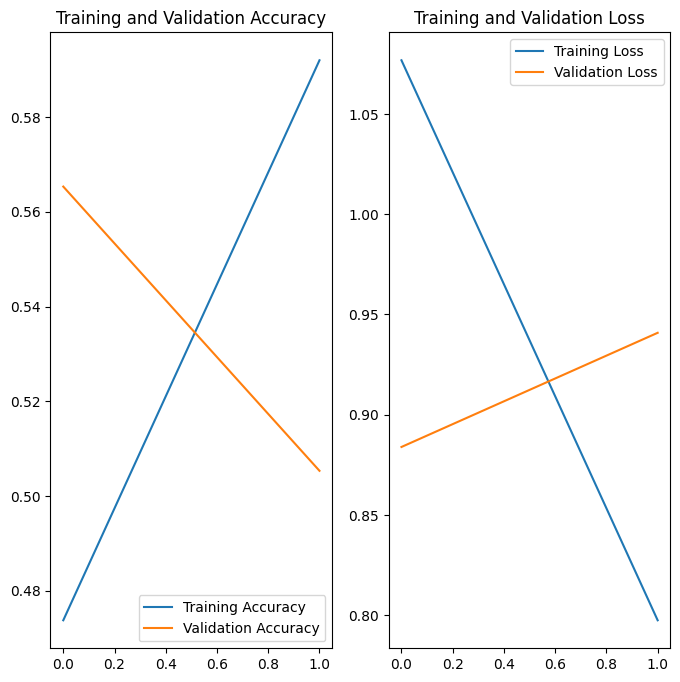

Training Accuracy:
0.5920000076293945
Testing Accuracy:
0.5053333044052124


In [58]:
train_test_animals()

# Ví dụ 3

Hãy sử dụng lại bộ ảnh dữ liệu các khuôn mặt facedata với 11 phân loại đã có trong
ví dụ trước. Chia dữ liệu thành các tập train:test tỷ lệ 8:2. Sau đó huấn luyện mô hình CNN đơn giản trong ví dụ 2 và
thực hiện dự đoán cho tập test.

In [9]:
import os
import shutil
import random
from collections import defaultdict

# Define the states
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
          'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink']

# Define the source and destination folders
source_folder = 'C:/Users/Admin/Desktop/ML/week7/face_data'
train_folder = 'train'
val_folder = 'validation'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Create subfolders for each state in train and validation folders
for state in states:
    os.makedirs(os.path.join(train_folder, state), exist_ok=True)
    os.makedirs(os.path.join(val_folder, state), exist_ok=True)

# Dictionary to hold filenames for each state
state_files = defaultdict(list)

# Get a list of all image files
image_files = [f for f in os.listdir(source_folder) if f.endswith('.png')]

# Categorize files by state
for image_file in image_files:
    # Split the filename by '.' to get the state
    parts = image_file.split('.')
    if len(parts) >= 3:  # Ensure there is at least one dot before the state
        state = parts[-2]  # State is the second-to-last part
        if state in states:
            state_files[state].append(image_file)

# Define the split ratio for train and validation
split_ratio = 0.8  # 80% train, 20% validation

# Split files into train and validation sets for each state
for state, files in state_files.items():
    random.shuffle(files)  # Shuffle to randomize the order
    split_idx = int(len(files) * split_ratio)
    train_files = files[:split_idx]
    val_files = files[split_idx:]

    # Move files to train and validation folders
    for file in train_files:
        src = os.path.join(source_folder, file)
        dst = os.path.join(train_folder, state, file)
        shutil.copy(src, dst)

    for file in val_files:
        src = os.path.join(source_folder, file)
        dst = os.path.join(val_folder, state, file)
        shutil.copy(src, dst)

print("Splitting and categorizing images complete.")

Splitting and categorizing images complete.


In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

a) Tính độ chính xác của mô hình theo các độ đo Accuracy, Precision và Recall trên cả tập train và test.

In [2]:
# Trains a model to classify images of 11 classes
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,
    3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(11, activation='softmax')
    ])
    
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

In [3]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.2)
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory('face_data/train',
    # Source directory
    target_size=(150, 150), # Resizes images
    batch_size=15,
    class_mode='categorical',subset = 'training')
    epochs = 1
    #Testing data
    validation_generator = train_datagen.flow_from_directory('face_data/validation',
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical',
    subset='validation') # set as validation data
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
    train_generator,
    steps_per_epoch=150,
    epochs=epochs,
    validation_data = validation_generator,

    validation_steps = 50,
    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(1, epochs + 1)  # Thay đổi đoạn này
    
    model.save_weights('saved_weights_3.h5')
    # returns accuracy of training
    from sklearn.metrics import accuracy_score, precision_score, recall_score

    # Dự đoán cho tập train
    train_predictions = model.predict(train_generator)
    train_labels = train_generator.classes
    train_accuracy = accuracy_score(train_labels, train_predictions.argmax(axis=1))
    train_precision = precision_score(train_labels, train_predictions.argmax(axis=1), average='weighted')
    train_recall = recall_score(train_labels, train_predictions.argmax(axis=1), average='weighted')

    # Dự đoán cho tập test
    test_predictions = model.predict(validation_generator)
    test_labels = validation_generator.classes
    test_accuracy = accuracy_score(test_labels, test_predictions.argmax(axis=1))
    test_precision = precision_score(test_labels, test_predictions.argmax(axis=1), average='weighted')
    test_recall = recall_score(test_labels, test_predictions.argmax(axis=1), average='weighted')

    print("Train Accuracy:", train_accuracy)
    print("Train Precision:", train_precision)
    print("Train Recall:", train_recall)

    print("Test Accuracy:", test_accuracy)
    print("Test Precision:", test_precision)
    print("Test Recall:", test_recall)


In [4]:
train_test_animals()

Found 132 images belonging to 11 classes.


Found 33 images belonging to 11 classes.


C:\Users\Admin\AppData\Local\Temp\ipykernel_19716\3283520566.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


7/7 [==============================] - 0s 13ms/step


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Accuracy: 0.06060606060606061
Train Precision: 0.03980595427963849
Train Recall: 0.06060606060606061
Test Accuracy: 0.12121212121212122
Test Precision: 0.023682200152788383
Test Recall: 0.12121212121212122


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Do dữ liệu training rất ít, có 11 phân lớp mà với mỗi phân lớp có trung bình trên dưới 10 ảnh, nên đưa ra kết quả với độ chính xác thâp

c) So sánh với kết quả khi kết hợp giảm chiều và sử dụng mô hình ANN hoặc Logistic đã có trong bài trước.

In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_dir = 'face_data/train'
validation_dir = 'face_data/validation'

In [6]:
# Function to resize images
def resize_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path)
    image = image.resize(target_size).convert("RGB")
    return np.array(image)

In [9]:
def load_data(train_dir):
    images = []
    labels = []
    for label in os.listdir(train_dir):
        
        label_dir = os.path.join(train_dir, label)
        for file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, file)
            # Resize image to 150x150
            try:
                resized_image = resize_image(image_path)
                images.append(resized_image)
                # Assign label based on folder name
                if label == 'centerlight':
                    labels.append(0)  
                elif label == 'glasses':
                    labels.append(1)
                elif label == 'happy':
                    labels.append(2)
                elif label == 'leftlight':
                    labels.append(3)  
                elif label == 'noglasses':
                    labels.append(4)
                elif label == 'normal':
                    labels.append(5)
                elif label == 'rightlight':
                    labels.append(6)
                elif label == 'sad':
                    labels.append(7)  
                elif label == 'sleepy':
                    labels.append(8)   
                elif label == 'surprise':
                    labels.append(9)
                elif label == 'wink':
                    labels.append(10)                                                           
            except Exception as e:
                print("Error processing image:", image_path)
                print("Error message:", str(e))
    return np.array(images), np.array(labels)


# Load and prepare data
images, labels = load_data(train_dir)

In [10]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [11]:
# Train a Softmax Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_flatten, y_train)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
# Evaluate the model
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.15151515151515152
Precision: 0.19090909090909092
Recall: 0.16666666666666666
F1 Score: 0.15151515151515152


Kết quả sau khi giảm chiều sử dụng mô hình cho thấy độ chính xác có sự cải thiện đáng kể so với ban đầu. Nhưng vẫn rất thấp do việc quá ít dữ liệu đầu vào cộng thêm của việc khoảng epoch vẫn chưa đủ